# Aula 8: Projeto de Ciência de Dados

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2022.

<hr>

Agora que vimos os conceitos básicos de Ciência de Dados, estamos prontos para desenvolver um projeto completo. As fases envolvidas no processo podem ser resumidas nos seguintes passos:<br>
1 - Formulação do problema e preparo dos dados.<br>
2 - Limpeza e normalização dos dados<br>
3 - Análise exploratória, Estatística Descritiva, PCA.<br>
4 - Aprendizado supervisionado através da validação cruzada (conjunto de teste).<br>
5 - Treinamento do modelo com todos os dados de treinamento.<br>
6 - Predição dos valores no conjunto de teste. <br>
7 - Avaliação do modelo.<br>
8 - Interpretação dos resultados.

Nessa aula, vamos considerar todos esses passos, de modo a construir um projeto de Ciência de Dados típico.

Vamos considerar o problema de classificação dos passageiros do Titanic disponível no portal Kaggle: https://www.kaggle.com/c/titanic. Ou seja, objetivamos construir um projeto para classificar os dados e posterior submissão, de modo a verificar o quão preciso são nossos resultados comparados com soluções de outros usuários. Vamos mostrar todas as fases do projeto e os resultados, mas lembramos que essa é uma possível solução. Um cientista de dados deve aprender com os erros e sempre tentar melhorar um projeto, aprendendo em todas as fases de seu desenvolvimento. 

## 1 - Formulação do problema e leitura dos dados

Vamos considerar a base de dados de passageiros que viajaram no Titanic. 

Os atributos contidos nos dados:<br>
1 - PassengerId: Número de identificação do passageiro;<br>
2 - Survived: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;<br>
3 - Pclass: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;<br>
4 - Name: Nome do passageiro;<br>
5 - Sex: Sexo do passageiro;<br>
6 - Age: Idade do passageiro em anos;<br>
7 - SibSp: Quantidade de irmãos e cônjuges a bordo;<br>
8 - Parch: Quantidade de pais e filhos a bordo;<br>
9 - Ticket: Número da passagem;<br>
10 - Fare: Preço da passagem;<br>
11 - Cabin: Número da cabine do passageiro;<br>
12 - Embarked: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente. 

### **Nosso objetivo é classificar os passageiros como sobreviventes (ou não) de acordo com o conjunto de atributos.**

Fazendo a leitura dos dados:

In [4]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv('titanic/train.csv', header=(0))
test = pd.read_csv('titanic/test.csv', header=(0))

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Notem que temos um conjunto de treinamento, que geralmente temos acesso em projetos de Ciência de Dados, e um conjunto de teste, que representa a aplicação de nosso modelo desenvolvido. É importante notar que, na prática, não vamos conhecer os resultados de problemas de classificação ou regressão, isto é, a saída $y$. No entanto, em nosso exemplo vamos poder submeter as soluções (a classificação do conjunto de teste) e verificar o quão boa é a nossa metodologia, comparando ainda com outras soluções apresentadas no site Kaggle. Em casos reais, as predições também poderão ser comparadas com resultados de casos desconhecidos ou predições futuras, como no caso de diagnóstico de doenças ou predição de preços no mercado de ações.

Assim, os dados no conjunto de teste não contém as classes, que devemos inferir.

In [5]:
print('Conjunto de teste')
test.head(10)

Conjunto de teste


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Após a leitura dos dados e formualação dos problemas, podemos passar à fase de pré-processamento.

## 2 - Limpeza e normalização dos dados

Vemos que alguns atributos são irrelavantes, como PassengerId, Name, Ticket e Cabin. Vamos retirar esses atributos dos conjuntos de teste e treinamento. No entanto, usaremos o atributo PassengerId quando formos submeter nossa solução no Kaggle. Portanto, temos que guardar essa informação.

In [6]:
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [7]:
PassengerId_test = test['PassengerId']
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


O conjunto de dados pode apresentar valores nulos (*not a number: nan*). A sua identificação pode ser feita usando-se métodos da biblioteca Pandas.

Vamos verificar quantos valores nulos temos em nossos dados.

In [8]:
train.isnull().sum().sort_values(ascending=False).head(10)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending=False).head(10)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

Se removermos a linhas com esses valores, vamos perder uma grande quantidade de dados. Para não descartamos as observações que contêm nan, vamos atribuir valores médios às entradas nulas nos dados numéricos e a moda nos atributos nominais. Essa é a estratégia mais simples, mas outra mais sofisticadas, que podem considerar modelos de regressão para realizar a predição, podem ser consideradas.

In [10]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

Vamos verificar novamente se os dados ainda contém valores nulos.

In [11]:
train.isnull().sum().sort_values(ascending=False).head(10)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
test.isnull().sum().sort_values(ascending=False).head(10)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Os atributos nominais podem ser transformados para numéricos usando one-hot-enconding.

In [13]:
train_original = train
train = pd.get_dummies(train)
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [14]:
test = pd.get_dummies(test)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


Para facilitar o processamento, vamos converter os dados para o formato numpy para podemos realizar a classificação.

In [17]:
data_train = train.to_numpy()
nrow,ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

Para o conjunto de teste:

In [18]:
data_test = test.to_numpy()
X_test = data_test

Vamos verificar se as classes estão balanceadas.

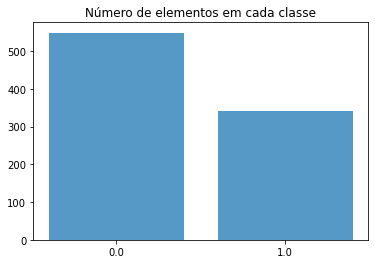

In [14]:
#classes = train[train.columns[0]]
classes = y_train
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Ou seja, há mais sobreviventes do que não-sobrevivente. Essa informação será importante na validação cruzada.

Vamos normalizar os dados:

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

print('Dados transformados:')
print('Media: ', np.mean(X_test, axis = 0))
print('Desvio Padrao:', np.std(X_test, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  2.23290646e-16  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -8.37339924e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dados transformados:
Media:  [-0.05156969  0.04413122 -0.06863058  0.01334498  0.06892064  0.02349348
 -0.02349348  0.14180391  0.08409087 -0.1771445 ]
Desvio Padrao: [1.00625661 0.97111866 0.81269066 1.21679298 1.12298531 1.00695788
 1.00695788 1.09804783 1.11376674 1.07106262]


## 3 - Análise descritiva dos dados

Podemos analisar as variáveis individualmente ou sua relação, de modo a entender melhor os dados.

Inicialmente, vamos analisar a correlação entre os atributos.

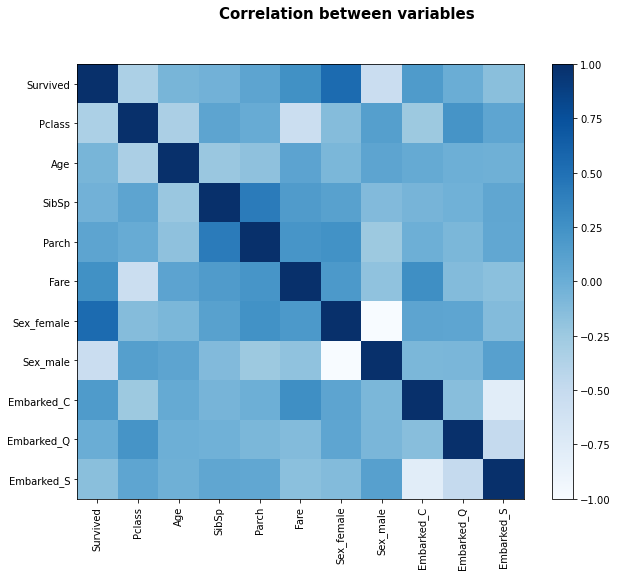

In [16]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Observamos que os atributos não são fortemente correlacionados. Além disso, vemos que as mulheres sobreviveram mais do que os homens.

Para confirmar esse resultado, vamos analisar os dados de arcordo com o gênero. Observamos que a taxa de sobrevivência dos homens foi em torno de 25%, enquanto que a das mulheres, de 75%. Portanto, saber se o passageiro era homem ou mulher é uma informaçãom importante a ser levada em conta na classificação.

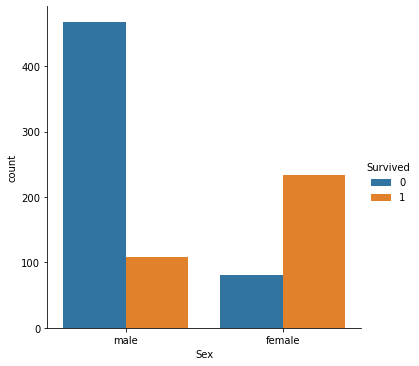

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_original)

Vamos analisar a relação entre a classe do passageiro e se o passageiro sobreviveu. Conforme observamos a seguir, grande parte das mortes ocorreram entre os passageiros da terceira classe. Portanto, essa informação também é importante para classificarmos os passageiros em sobreviventes. 

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

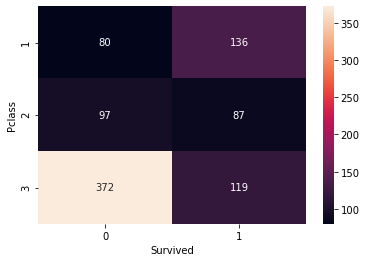

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

group = train_original.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

De acordo com a idade, vemos que boa parte das crianças sobreviveram. Além disso, as mulheres com mais idade e os homens mais jovens apresentaram uma chance maior de sobrevier.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

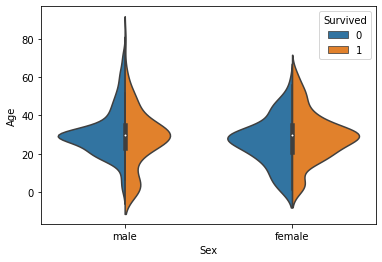

In [19]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_original, split = True)

De acordo com o preço do bilhete, vemos que quanto mais caro, maior é a chance de sobrevivência, o que reforça que classe de embarque é uma variável importante.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

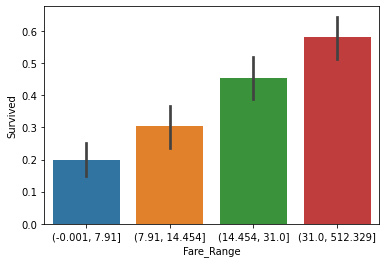

In [20]:
# Divide Fare into 4 bins
train_original['Fare_Range'] = pd.qcut(train_original['Fare'], 4)
 
# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = train_original)

De acordo com o porto de embarque, notamos que a maioria dos sobreviventes são do porto de Southampton (S). Além disso, em Queenstown (Q) embaracaram a maioria dos passageiros da terceira classe.

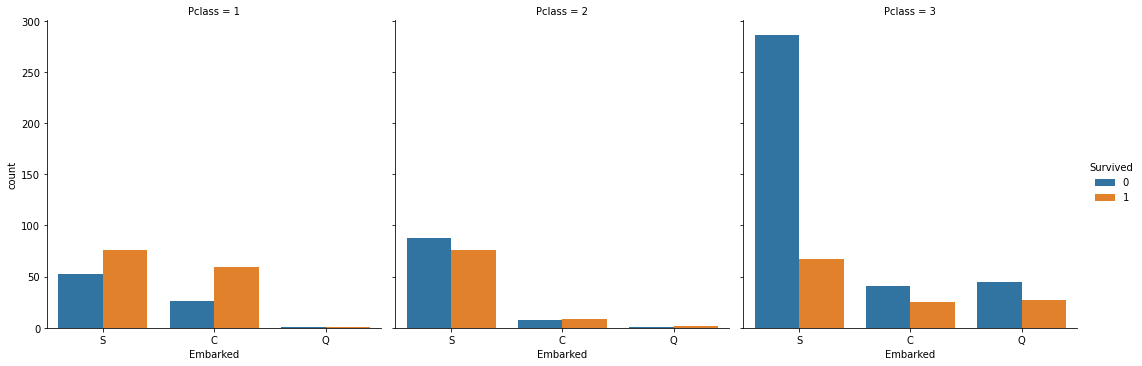

In [21]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_original)

Portanto, vemos que vários atributos são importantes para separar as classes.

Podemos ter uma ideia da separação entre as classes realizando a projeção dos atributos em duas dimensões usando PCA.

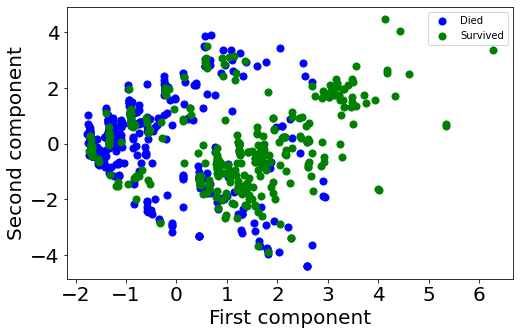

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

classes = np.unique(y_train)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y_train == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], 
                label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Realizando o agrupamento usando o método k-means:

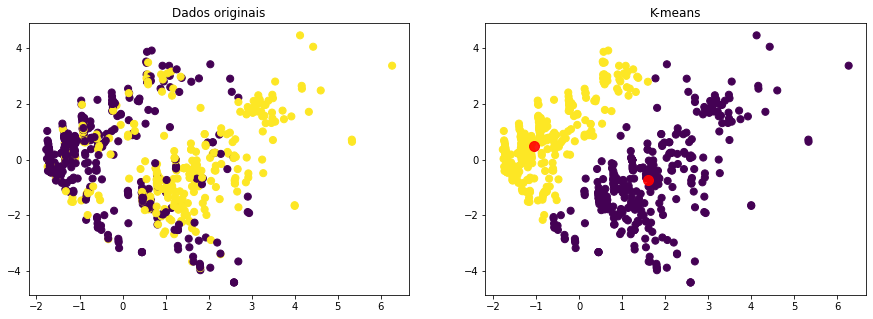

In [23]:
from sklearn.cluster import KMeans
k = 2 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(pca_result)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(pca_result)

plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2, 1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train, cmap='viridis', s=50)
plt.title('Dados originais')
plt.show(True)


Calculando a informação mútua normalizada:

In [24]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print('Mutual information score:', 
      normalized_mutual_info_score(y_km, y_train, average_method='arithmetic'))

Mutual information score: 0.19170914817409618


Como esse valor é baixo, temos que em duas dimensões, a separação não é clara. Logo, projetar os dados em duas dimensões para realizar a classificação pode levar a uma perda de desempenho do classificador. Além disso, esse resultado mostra que a separação entre as classes usando os atributos disponíveis não é trivial.

## 4 - Seleção e ajuste do modelo

Vamos comparar diversos métodos de classificação, usando validação cruzada. Como os dados são desbalanceados, precisamos levar essa informação em conta na validação. Para mediar a precisão da classificação, podemos usar a área sobre a curva Roc (AUC), pois temos apenas duas classes. Vamos comparar vários classificadores.

Vamos utilizar validação cruzada aninhada.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = [{'n_neighbors': np.arange(1, 51), 
               'metric': ['euclidean', 'minkowski','chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10, 
                    scoring='roc_auc', return_train_score=False,verbose=1)
  
# fitting the model for grid search
model.fit(X_train, y_train)
print(model.best_params_)
model.score(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'metric': 'euclidean', 'n_neighbors': 8}


0.9202936759019589

## 5 - Classificação

Após encontrar o melhor valor de $k$, podemos fazer a classificação usando o método dos k-vizinhos nos dados desconhecidos. Os resultados serão gravados em um arquivo para submetermos ao Kaggle.

In [26]:
y_pred=model.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-knn.csv', index = False)

Enviando nossa solução para o Kaggle, obtemos: **Your submission scored 0.76794**

## 5 - Comparação com outros modelos

Vamos considerar outros modelos para tentar melhorar o resultado da classificação.

### 5.1 - Random forest

Melhor n: 47  AUC: 0.8046118043176866


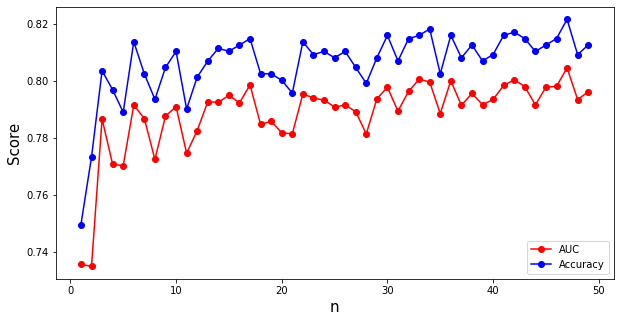

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X_train, y_train):
        # select rows
        x_t, x_validation = X_train[train_index], X_train[test_index]
        y_t, y_validation = y_train[train_index], y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation) 
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Realizando a classificação final e gravando o resultado em um arquivo:

In [28]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF.csv', index = False)

Após submter, obtemos: **Your submission scored 0.77990**.

No caso do classificador random forests, podemos ordenar os atributos de acordo com a sua importância.

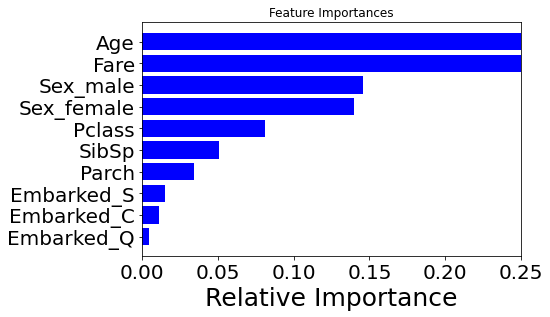

In [29]:
importances = model.feature_importances_
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])
plt.show()

Para tentarmos melhorar a classificação, temos que considerar outras estratégias. Vamos usar um número menor de atributos. Vamos escolher de acordo com a saída do random forest, mas podemos usar outros critérios para escolher os atributos.

In [32]:
ns = 3 #numero de atributos selecionados
selected_attributes = []
for i in range(0,ns):
    selected_attributes.append(attributes_rank[::-1][i])
print('Selecionados:', selected_attributes)
data_train = train[selected_attributes]
data_train = data_train.to_numpy()
X_train = data_train

data_test = test[selected_attributes]
data_test = data_test.to_numpy()
X_test = data_test

Selecionados: ['Age', 'Fare', 'Sex_male']


Padronizando os dados:

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

Dados transformados:
Media:  [ 2.23290646e-16  3.98733297e-18 -1.15632656e-16]
Desvio Padrao: [1. 1. 1.]


Melhor n: 38  AUC: 0.7775094078035254


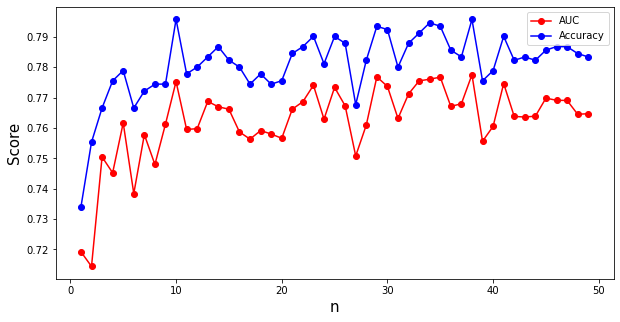

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X_train, y_train):
        # select rows
        x_t, x_validation = X_train[train_index], X_train[test_index]
        y_t, y_validation = y_train[train_index], y_train[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation) 
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Realizando a classificação final e gravando o resultado em um arquivo:

In [87]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF2.csv', index = False)

Enviando nossa solução para o Kaggle, obtemos: **Your submission scored 0.77990**

### 5.2 - Naive Bayes

In [88]:
data_train = train.to_numpy()
nrow,ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

data_test = test.to_numpy()
X_test = data_test
X_test = data_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  2.23290646e-16  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -8.37339924e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [90]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-NB.csv', index = False)

Enviando nossa solução para o Kaggle, obtemos: **Your submission scored 0.77033**

### Exercício

Tente melhorar a classificação no Kaggle.